In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install plotly

# for visualizations
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime # Time Series analysis.

In [2]:
df1 = pd.read_csv('E:\Weather Forecasting of Jaipur\JaipurFinalCleanData.csv')
df2 = pd.read_csv('E:\Weather Forecasting of Jaipur\JaipurRawData3.csv')
print (df1)

           date  meantempm  maxtempm  mintempm  meantempm_1  meantempm_2  \
0    04-05-2016         34        41        27           35           36   
1    05-05-2016         31        38        24           34           35   
2    06-05-2016         28        34        21           31           34   
3    07-05-2016         30        38        23           28           31   
4    08-05-2016         34        41        26           30           28   
..          ...        ...       ...       ...          ...          ...   
671  07-03-2018         24        32        15           22           23   
672  08-03-2018         24        32        15           24           22   
673  09-03-2018         26        33        19           24           24   
674  10-03-2018         26        34        19           26           24   
675  11-03-2018         26        34        18           26           26   

     meantempm_3  meandewptm_1  meandewptm_2  meandewptm_3  ...    MAR    APR  \
0     

In [3]:
print (df2)

           date  meantempm  meandewptm  meanpressurem  maxhumidity  \
0    01-05-2016         34          -1        1005.63           24   
1    02-05-2016         36           4        1005.46           21   
2    03-05-2016         35           6        1006.00           27   
3    04-05-2016         34           7        1005.65           29   
4    05-05-2016         31          11        1007.94           61   
..          ...        ...         ...            ...          ...   
674  07-03-2018         24           2        1014.07           55   
675  08-03-2018         24           1        1014.41           42   
676  09-03-2018         26           3        1014.16           37   
677  10-03-2018         26           4        1013.76           38   
678  11-03-2018         26           3        1013.00           46   

     minhumidity  maxtempm  mintempm  maxdewptm  mindewptm  maxpressurem  \
0              4        43        26          9        -10          1009   
1      

In [4]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [5]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [6]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [7]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('E:\Weather Forecasting of Jaipur\JaipurFinalCleanData.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'E:\Weather Forecasting of Jaipur\JaipurFinalCleanData.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 676 rows and 55 columns


In [8]:
df1.head(5)

date  meantempm  maxtempm  mintempm  meantempm_1  meantempm_2  \
0  04-05-2016         34        41        27           35           36   
1  05-05-2016         31        38        24           34           35   
2  06-05-2016         28        34        21           31           34   
3  07-05-2016         30        38        23           28           31   
4  08-05-2016         34        41        26           30           28   

   meantempm_3  meandewptm_1  meandewptm_2  meandewptm_3  ...    MAR    APR  \
0           34             6             4            -1  ...  23.49  26.41   
1           36             7             6             4  ...  24.10  26.54   
2           35            11             7             6  ...  22.46  26.03   
3           34            13            11             7  ...  22.95  26.73   
4           31            10            13            11  ...  21.78  24.84   

     MAY    JUN    JUL    AUG    SEP    OCT    NOV    DEC  
0  28.28  28.60  27.49  26.98  26.26  25.08  21.73  18.95  
1  28.68  28.44  27.29  27.05  25.95  24.37  21.33  18.78  
2  27.93  28.41  28.04  26.63  26.34  24.57  20.96  18.29  
3  27.83  27.85  26.84  26.73  25.84  24.36  21.07  18.84  
4  28.32  28.69  27.67  27.47  26.29  26.16  22.07  18.71  

[5 rows x 55 columns]

C:\Users\shivam kumar\AppData\Local\Temp/ipykernel_10508/964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


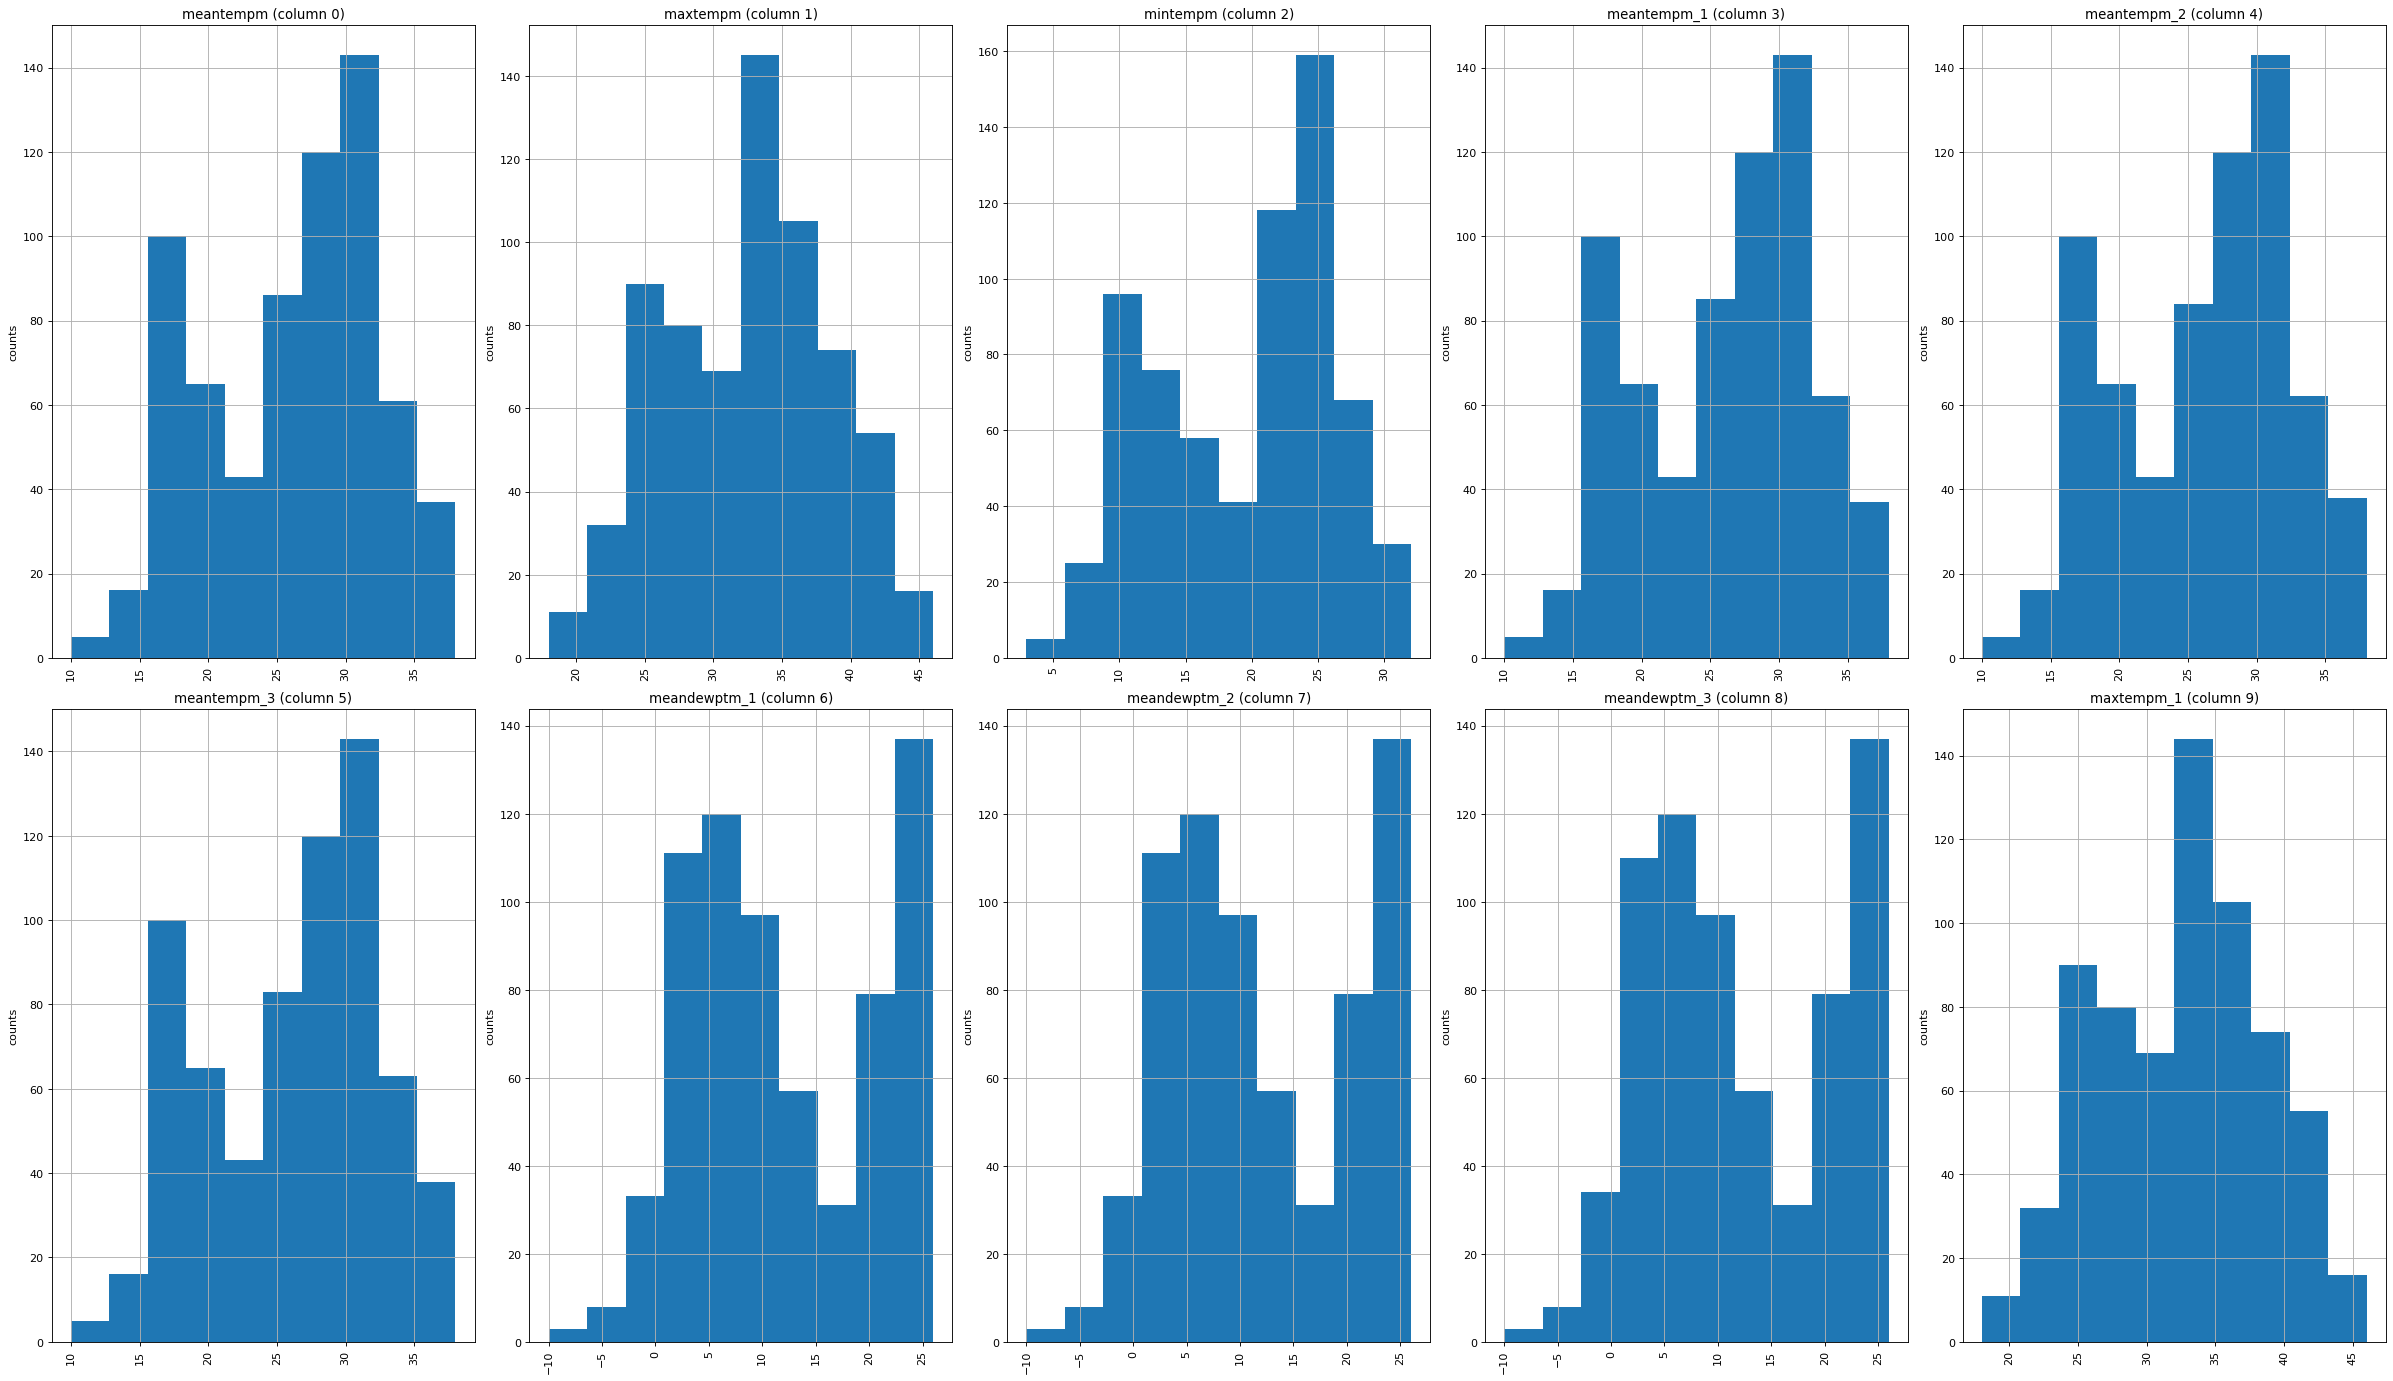

In [9]:
plotPerColumnDistribution(df1, 10, 5)

C:\Users\shivam kumar\AppData\Local\Temp/ipykernel_10508/3510424060.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


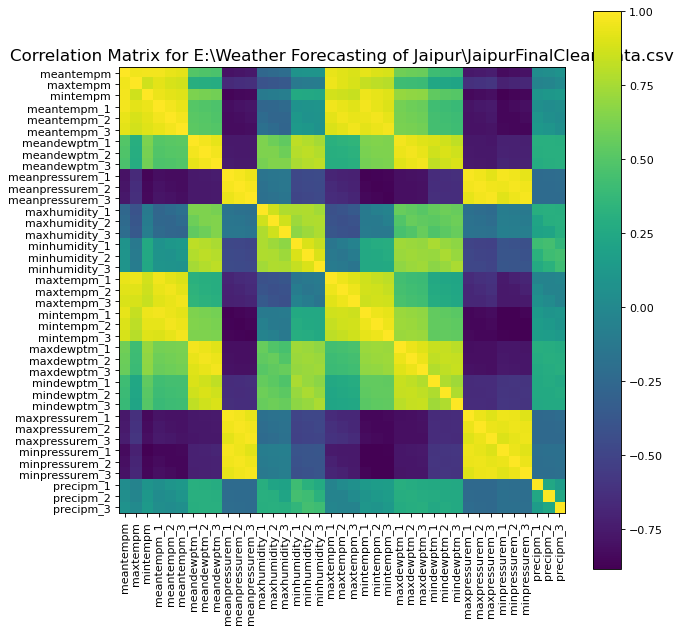

In [10]:
plotCorrelationMatrix(df1, 9)

C:\Users\shivam kumar\AppData\Local\Temp/ipykernel_10508/102845399.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


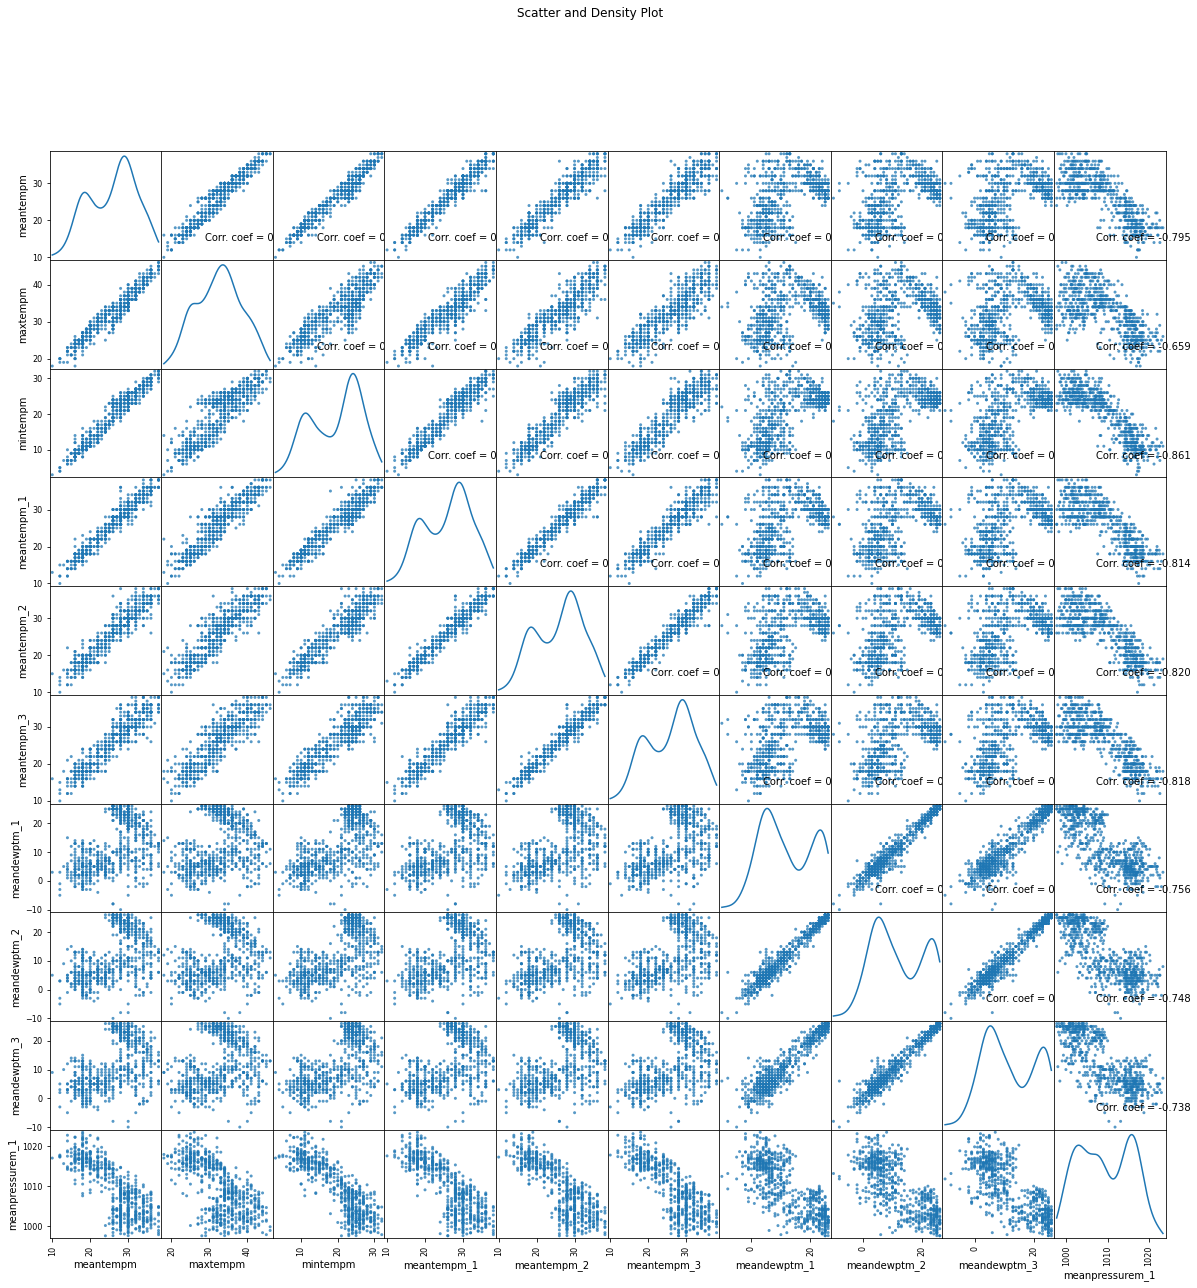

In [11]:
plotScatterMatrix(df1, 20, 10)

In [12]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df2 = pd.read_csv('E:\Weather Forecasting of Jaipur\JaipurRawData3.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'E:\Weather Forecasting of Jaipur\JaipurRawData3.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 679 rows and 13 columns


In [13]:
df2.head(5)

date  meantempm  meandewptm  meanpressurem  maxhumidity  minhumidity  \
0  01-05-2016         34          -1        1005.63           24            4   
1  02-05-2016         36           4        1005.46           21            6   
2  03-05-2016         35           6        1006.00           27            5   
3  04-05-2016         34           7        1005.65           29            6   
4  05-05-2016         31          11        1007.94           61           13   

   maxtempm  mintempm  maxdewptm  mindewptm  maxpressurem  minpressurem  \
0        43        26          9        -10          1009           999   
1        43        29         10         -2          1008          1001   
2        41        29         12         -2          1009          1000   
3        41        27         13          0          1008          1001   
4        38        24         16          6          1011          1003   

   precipm  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      5.0

C:\Users\shivam kumar\AppData\Local\Temp/ipykernel_10508/964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


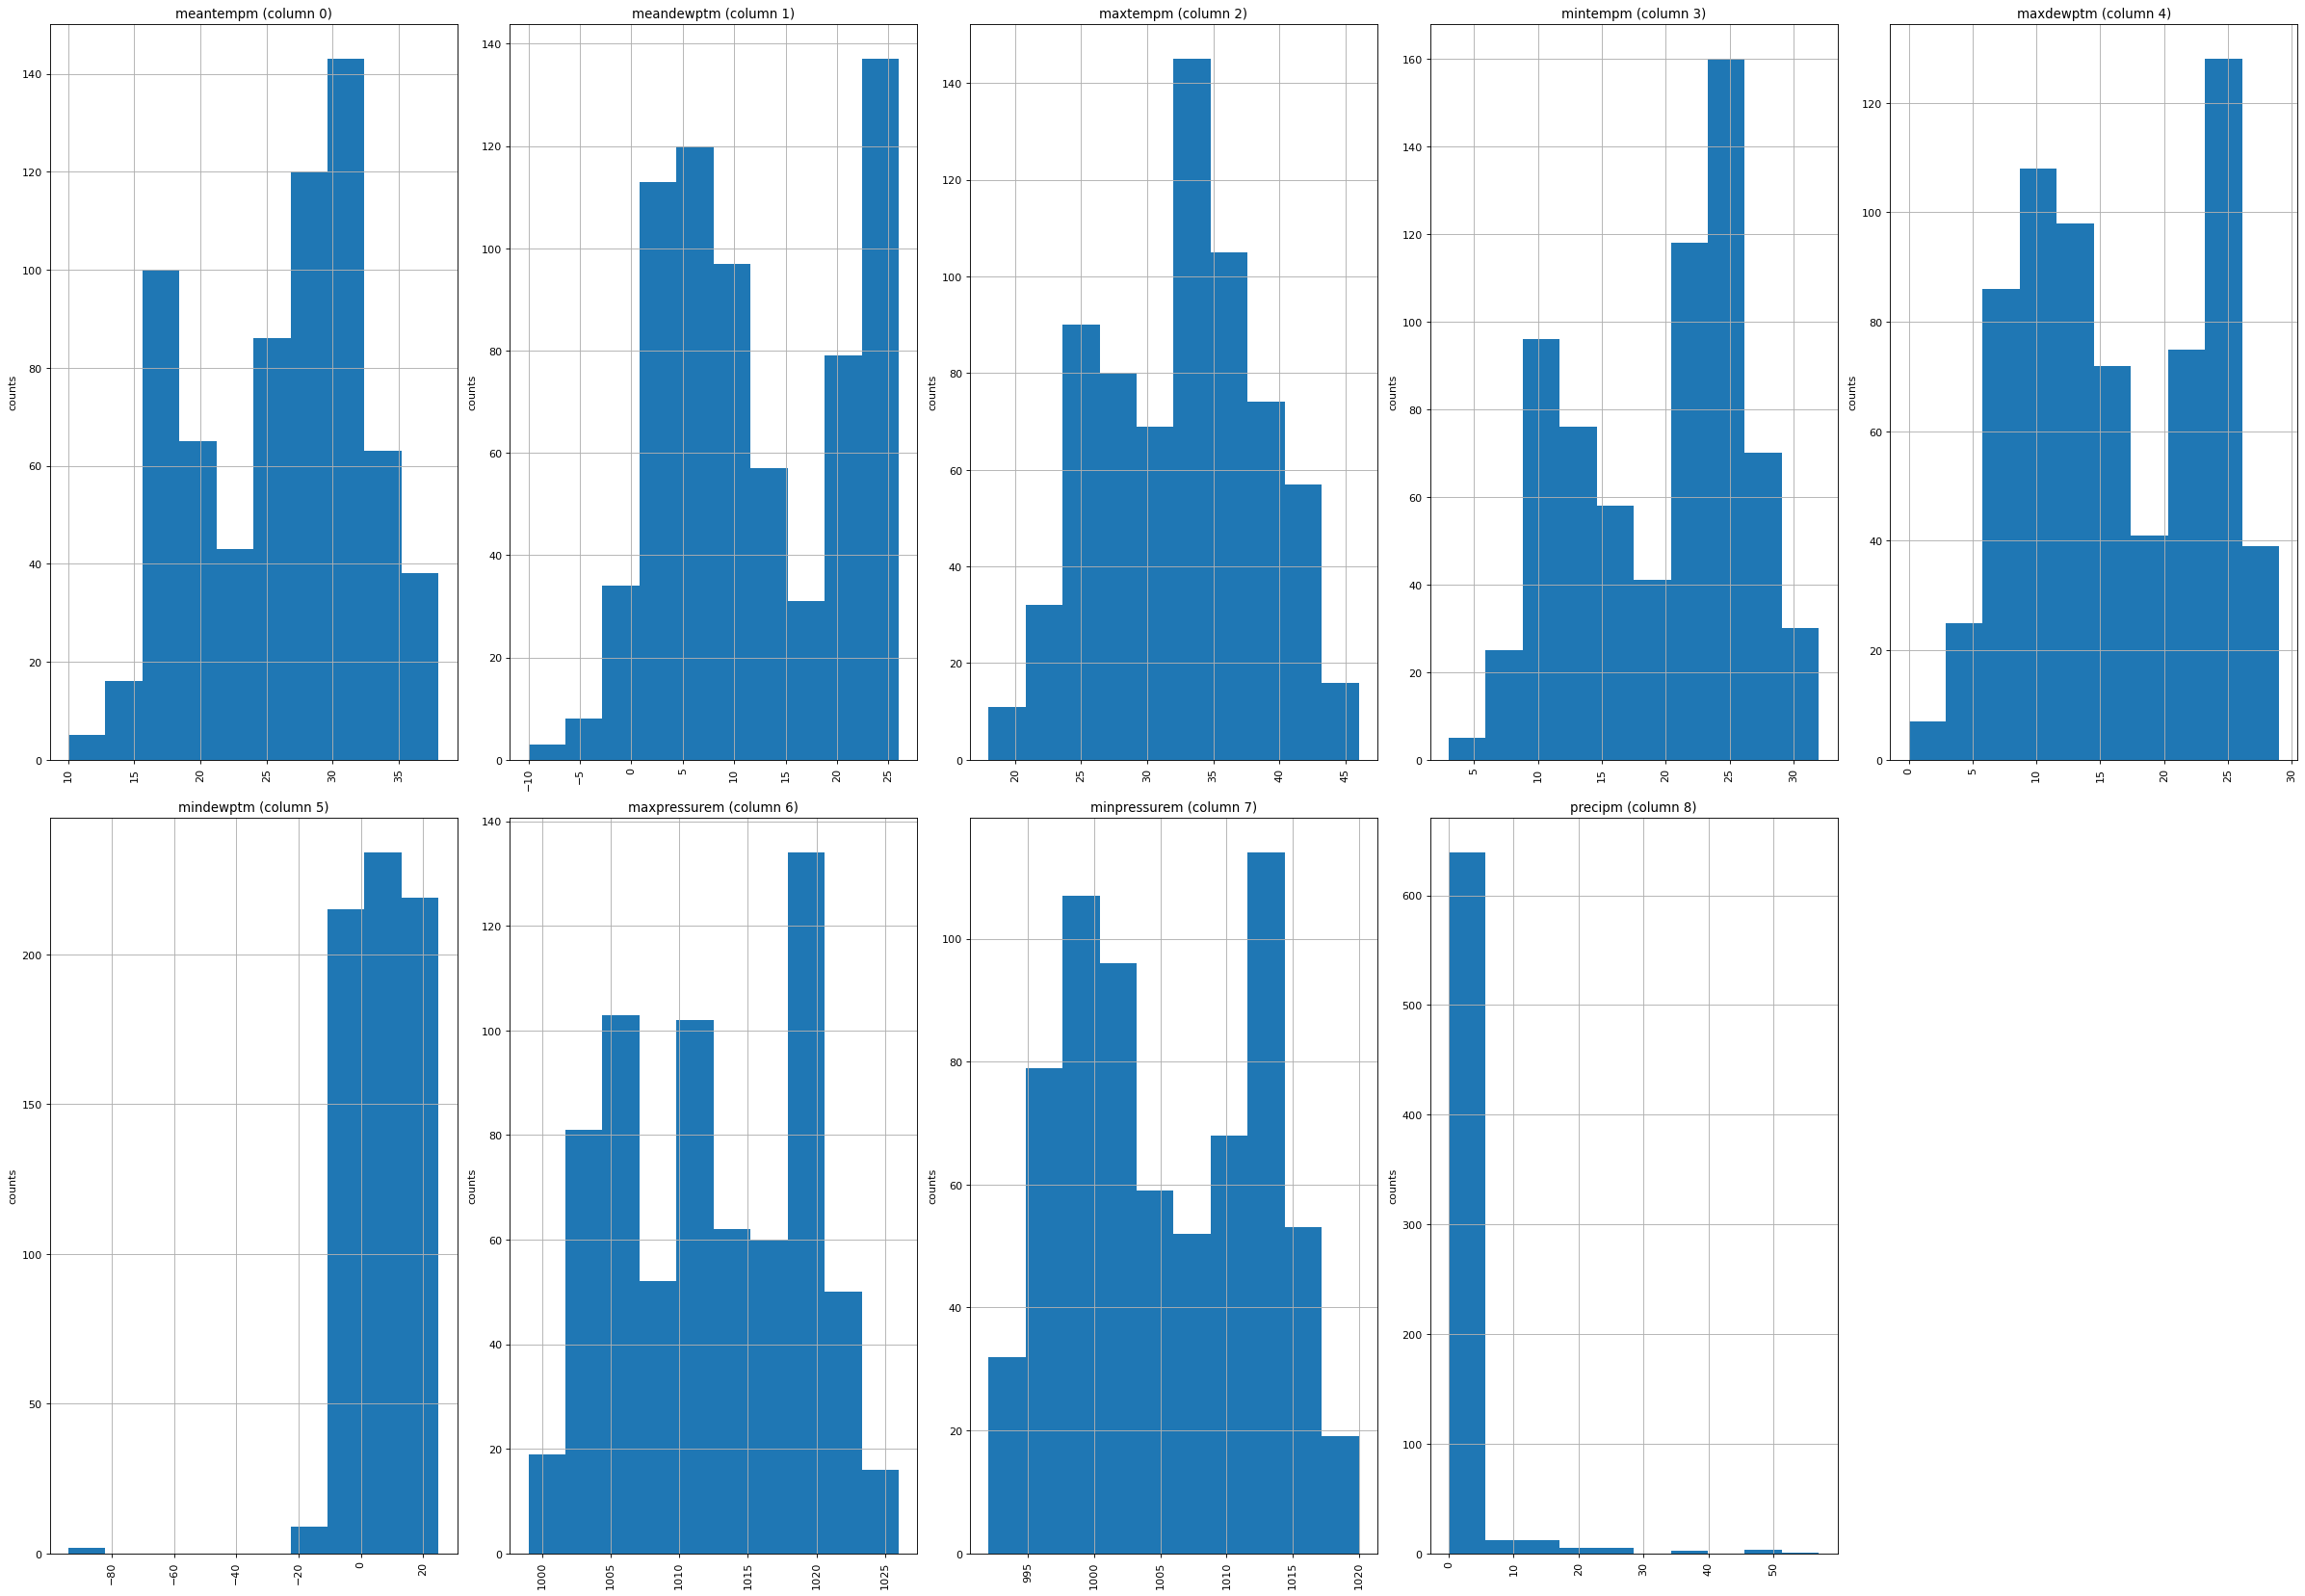

In [14]:
plotPerColumnDistribution(df2, 10, 5)

C:\Users\shivam kumar\AppData\Local\Temp/ipykernel_10508/3510424060.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


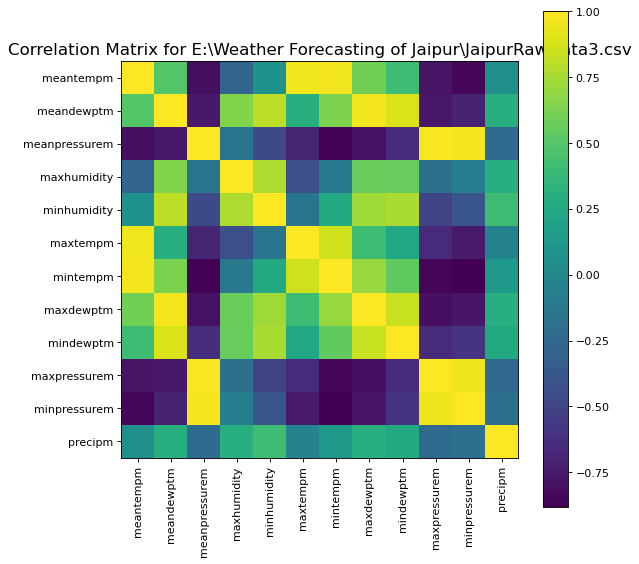

In [15]:
plotCorrelationMatrix(df2, 8)

C:\Users\shivam kumar\AppData\Local\Temp/ipykernel_10508/102845399.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


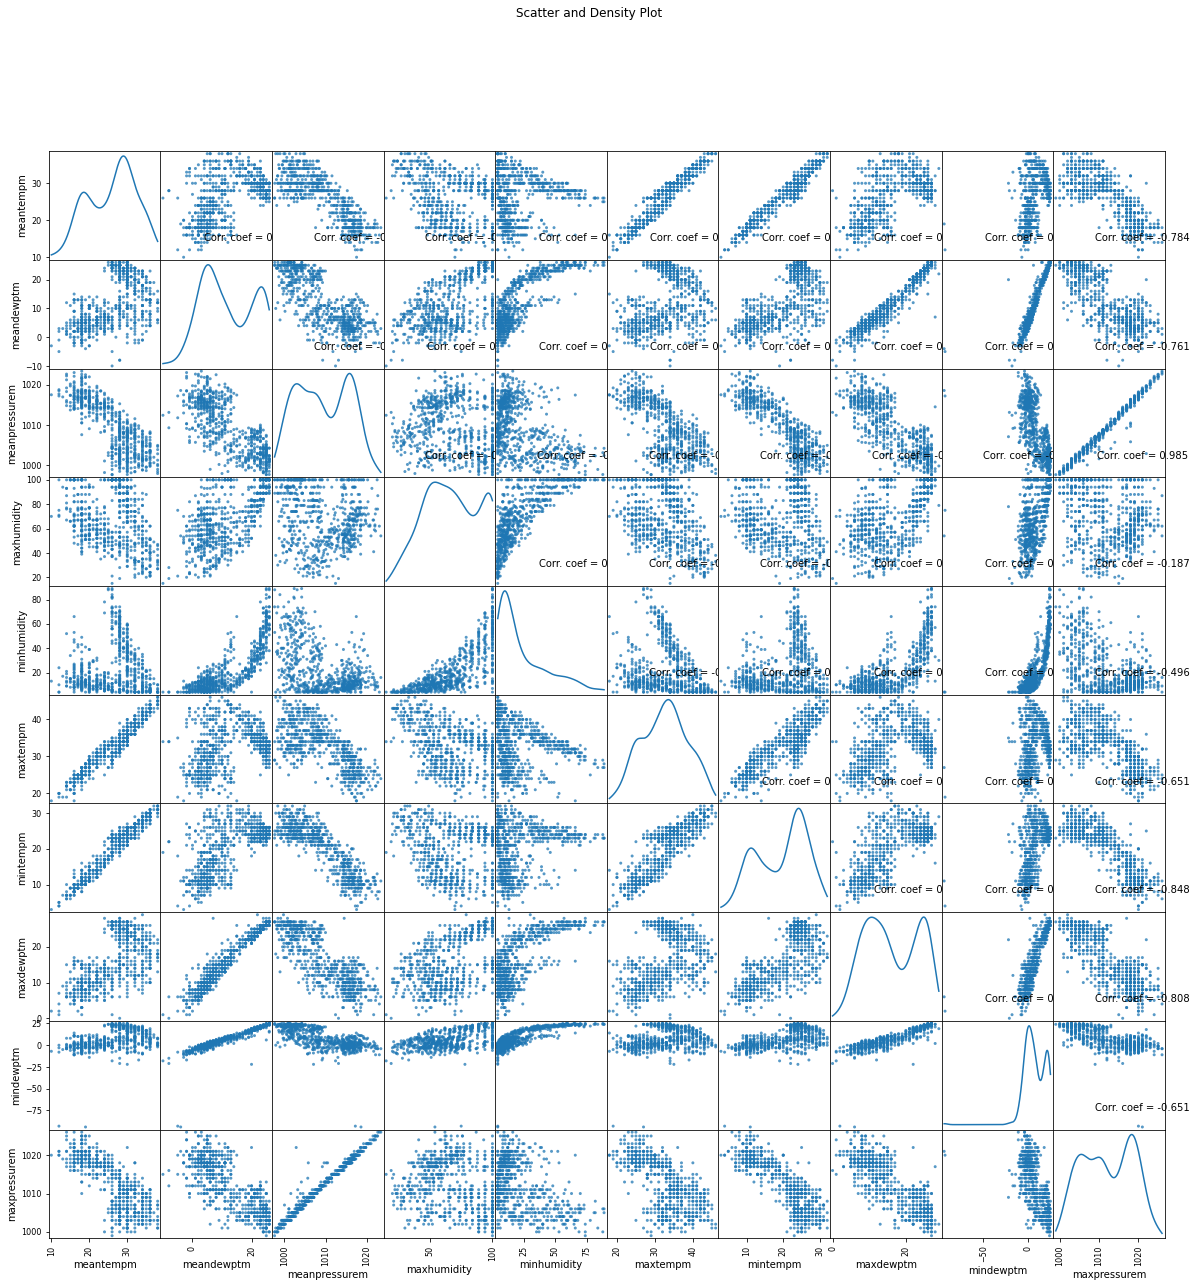

In [16]:
plotScatterMatrix(df2, 20, 10)

In [17]:
df1 = pd.read_csv('E:\Weather Forecasting of Jaipur\JaipurFinalCleanData.csv')
df2 = pd.read_csv('E:\Weather Forecasting of Jaipur\JaipurRawData3.csv')

In [18]:
df1.head(10)

date  meantempm  maxtempm  mintempm  meantempm_1  meantempm_2  \
0  04-05-2016         34        41        27           35           36   
1  05-05-2016         31        38        24           34           35   
2  06-05-2016         28        34        21           31           34   
3  07-05-2016         30        38        23           28           31   
4  08-05-2016         34        41        26           30           28   
5  09-05-2016         34        42        27           34           30   
6  10-05-2016         34        41        27           34           34   
7  11-05-2016         32        40        25           34           34   
8  12-05-2016         34        42        27           32           34   
9  13-05-2016         34        42        26           34           32   

   meantempm_3  meandewptm_1  meandewptm_2  meandewptm_3  ...    MAR    APR  \
0           34             6             4            -1  ...  23.49  26.41   
1           36             7             6             4  ...  24.10  26.54   
2           35            11             7             6  ...  22.46  26.03   
3           34            13            11             7  ...  22.95  26.73   
4           31            10            13            11  ...  21.78  24.84   
5           28             8            10            13  ...  22.21  26.53   
6           30            11             8            10  ...  22.03  26.98   
7           34            16            11             8  ...  22.93  27.06   
8           34            16            16            11  ...  23.40  25.76   
9           34            13            16            16  ...  22.90  25.96   

     MAY    JUN    JUL    AUG    SEP    OCT    NOV    DEC  
0  28.28  28.60  27.49  26.98  26.26  25.08  21.73  18.95  
1  28.68  28.44  27.29  27.05  25.95  24.37  21.33  18.78  
2  27.93  28.41  28.04  26.63  26.34  24.57  20.96  18.29  
3  27.83  27.85  26.84  26.73  25.84  24.36  21.07  18.84  
4  28.32  28.69  27.67  27.47  26.29  26.16  22.07  18.71  
5  29.06  28.02  27.46  26.82  26.23  24.75  21.93  19.55  
6  27.52  27.66  27.28  26.38  26.26  24.72  22.11  18.46  
7  28.07  28.49  27.16  26.41  25.74  24.25  21.06  18.15  
8  27.97  27.67  26.56  26.43  25.47  24.37  22.01  18.86  
9  28.36  27.72  26.93  26.61  25.98  24.04  20.72  18.05  

[10 rows x 55 columns]

In [19]:
df2.head(10)

date  meantempm  meandewptm  meanpressurem  maxhumidity  minhumidity  \
0  01-05-2016         34          -1        1005.63           24            4   
1  02-05-2016         36           4        1005.46           21            6   
2  03-05-2016         35           6        1006.00           27            5   
3  04-05-2016         34           7        1005.65           29            6   
4  05-05-2016         31          11        1007.94           61           13   
5  06-05-2016         28          13        1008.39           69           18   
6  07-05-2016         30          10        1007.62           50            8   
7  08-05-2016         34           8        1006.73           32            7   
8  09-05-2016         34          11        1005.75           45            7   
9  10-05-2016         34          16        1007.10           51           12   

   maxtempm  mintempm  maxdewptm  mindewptm  maxpressurem  minpressurem  \
0        43        26          9        -10          1009           999   
1        43        29         10         -2          1008          1001   
2        41        29         12         -2          1009          1000   
3        41        27         13          0          1008          1001   
4        38        24         16          6          1011          1003   
5        34        21         17          9          1011          1004   
6        38        23         14          6          1010          1002   
7        41        26         12          6          1010          1002   
8        42        27         16          7          1008          1000   
9        41        27         18         13          1010          1002   

   precipm  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      5.0  
5      0.0  
6      0.0  
7      0.0  
8      0.3  
9      0.8

In [20]:
df1.sort_values(by='date', inplace=True) ## To get the time series right.
fig = go.Figure(layout = go.Layout(yaxis=dict(range=[0, df1['meantempm'].max()+1])))
fig.add_trace(go.Scatter(x=df1['date'], y=df1['meantempm']), )
fig.update_layout(title='Temprature Throught Timeline:',
                 xaxis_title='Time', yaxis_title='Temprature in Degrees')
fig.update_layout(xaxis=go.layout.XAxis(
    rangeselector=dict(
        buttons=list([dict(label="Whole View", step="all"),
                      dict(count=1,label="One Year View",step="year",stepmode="todate")                      
                     ])),
        rangeslider=dict(visible=True),type="date")
)
fig.show()

In [21]:
fig = px.box(df1,'maxtempm','mintempm','meantempm')
fig.update_layout(title='Warmest, Coldest and Median Monthly Tempratue.')
fig.show()

In [22]:
from sklearn.cluster import KMeans
sse = []
target = df1['meantempm'].to_numpy().reshape(-1,1)
num_clusters = list(range(1, 10))

for k in num_clusters:
    km = KMeans(n_clusters=k)
    km.fit(target)
    sse.append(km.inertia_)

fig = go.Figure(data=[
    go.Scatter(x = num_clusters, y=sse, mode='lines'),
    go.Scatter(x = num_clusters, y=sse, mode='markers')
])

fig.update_layout(title="Evaluation on number of clusters:",
                 xaxis_title = "Number of Clusters:",
                 yaxis_title = "Sum of Squared Distance",
                 showlegend=False)
fig.show()

F:\New folder\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



In [23]:
from sklearn.cluster import KMeans
sse = []
target = df2['meantempm'].to_numpy().reshape(-1,1)
num_clusters = list(range(1, 10))

for k in num_clusters:
    km = KMeans(n_clusters=k)
    km.fit(target)
    sse.append(km.inertia_)

fig = go.Figure(data=[
    go.Scatter(x = num_clusters, y=sse, mode='lines'),
    go.Scatter(x = num_clusters, y=sse, mode='markers')
])

fig.update_layout(title="Evaluation on number of clusters:",
                 xaxis_title = "Number of Clusters:",
                 yaxis_title = "Sum of Squared Distance",
                 showlegend=False)
fig.show()

F:\New folder\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



In [24]:
fig = px.histogram(x=df1['minpressurem_1'], nbins=200, histnorm='density')
fig.update_layout(title='Frequency chart of minpressurem_1 readings:',
                 xaxis_title='minpressurem_1', yaxis_title='Count')

In [25]:
fig = px.histogram(x=df1['maxpressurem_1'], nbins=200, histnorm='density')
fig.update_layout(title='Frequency chart of maxpressurem_1 readings:',
                 xaxis_title='maxpressurem_1', yaxis_title='Count')

In [26]:
tmp = df1[['mintempm', 'maxtempm']].head(10)
tmp


mintempm  maxtempm
242        12        24
606         8        23
273        12        24
637        12        29
301        18        32
665        20        34
332        25        40
362        27        39
28         28        42
393        20        31

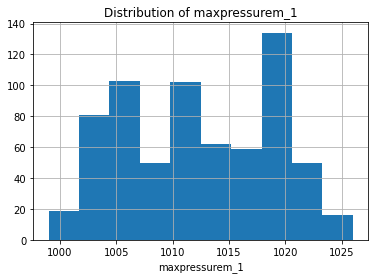

In [27]:
df1.maxpressurem_1.hist()
plt.title('Distribution of maxpressurem_1')
plt.xlabel('maxpressurem_1')
plt.show()


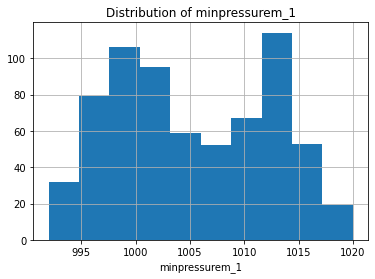

In [28]:
df1.minpressurem_1.hist()
plt.title('Distribution of minpressurem_1')
plt.xlabel('minpressurem_1')
plt.show()

In [29]:
precip = df1[['precipm_1', 'precipm_2']].head(10)
precip

precipm_1  precipm_2
242        0.0        0.0
606        0.0        0.0
273        0.0        0.0
637        0.0        0.0
301        0.0        0.0
665        0.0        0.0
332        0.0        0.0
362        0.0        0.0
28         0.0        0.0
393       23.0        0.0

In [30]:
meantemp = df1[['meantempm_1', 'meantempm_2']].head(10)
meantemp

meantempm_1  meantempm_2
242           16           17
606           16           16
273           18           18
637           22           20
301           25           22
665           25           24
332           30           32
362           32           32
28            34           32
393           30           31

In [31]:
df3 = pd.read_csv("E:\Weather.csv")
print(df3)

     Unnamed: 0  YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG  \
0             0  1901  17.99  19.43  23.49  26.41  28.28  28.60  27.49  26.98   
1             1  1902  19.00  20.39  24.10  26.54  28.68  28.44  27.29  27.05   
2             2  1903  18.32  19.79  22.46  26.03  27.93  28.41  28.04  26.63   
3             3  1904  17.77  19.39  22.95  26.73  27.83  27.85  26.84  26.73   
4             4  1905  17.40  17.79  21.78  24.84  28.32  28.69  27.67  27.47   
..          ...   ...    ...    ...    ...    ...    ...    ...    ...    ...   
112         112  2013  18.88  21.07  24.53  26.97  29.06  28.24  27.50  27.22   
113         113  2014  18.81  20.35  23.34  26.91  28.45  29.42  28.07  27.42   
114         114  2015  19.02  21.23  23.52  26.52  28.82  28.15  28.03  27.64   
115         115  2016  20.92  23.58  26.61  29.56  30.41  29.70  28.18  28.17   
116         116  2017  20.59  23.08  25.58  29.17  30.47  29.44  28.31  28.12   

       SEP    OCT    NOV   

In [32]:
 df3.head(10)

Unnamed: 0  YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG  \
0           0  1901  17.99  19.43  23.49  26.41  28.28  28.60  27.49  26.98   
1           1  1902  19.00  20.39  24.10  26.54  28.68  28.44  27.29  27.05   
2           2  1903  18.32  19.79  22.46  26.03  27.93  28.41  28.04  26.63   
3           3  1904  17.77  19.39  22.95  26.73  27.83  27.85  26.84  26.73   
4           4  1905  17.40  17.79  21.78  24.84  28.32  28.69  27.67  27.47   
5           5  1906  17.50  19.14  22.21  26.53  29.06  28.02  27.46  26.82   
6           6  1907  19.27  19.42  22.03  26.98  27.52  27.66  27.28  26.38   
7           7  1908  18.35  19.73  22.93  27.06  28.07  28.49  27.16  26.41   
8           8  1909  17.79  19.05  23.40  25.76  27.97  27.67  26.56  26.43   
9           9  1910  18.14  19.72  22.90  25.96  28.36  27.72  26.93  26.61   

     SEP    OCT    NOV    DEC  
0  26.26  25.08  21.73  18.95  
1  25.95  24.37  21.33  18.78  
2  26.34  24.57  20.96  18.29  
3  25.84  24.36  21.07  18.84  
4  26.29  26.16  22.07  18.71  
5  26.23  24.75  21.93  19.55  
6  26.26  24.72  22.11  18.46  
7  25.74  24.25  21.06  18.15  
8  25.47  24.37  22.01  18.86  
9  25.98  24.04  20.72  18.05

In [33]:
df3 = pd.melt(df3, id_vars='YEAR', value_vars=df3.columns[1:])
df3.head() 

YEAR variable  value
0  1901      JAN  17.99
1  1902      JAN  19.00
2  1903      JAN  18.32
3  1904      JAN  17.77
4  1905      JAN  17.40